## <span style="color:#2F749F;"><strong>Ejercicio 1. Limpieza e imputación de un conjunto de datos mixto</strong></span>

#### <span style="color:#2F749F;"><strong>📋 Instrucciones</strong></span>

1. Crea el DataFrame base **df** ejecutando el siguiente código:
    ```python
    df = pd.DataFrame({
        'Nombre': ['Ana', 'Luis', 'Pedro', None, 'Marta', 'Luis', 'Sofía'],
        'Edad': [25, np.nan, 35, 29, -5, 25, None],
        'Ciudad': ['Bogotá', 'Medellín', None, 'Medellín', 'Cali', 'Bogotá', 'Cali'],
        'Ingreso': [3500, 4800, np.nan, 5200, 5100, np.nan, 4700],
        'FechaIngreso': ['2023-01-01', '2023-01-05', None, '2023-01-10', '2023-01-12', None, '2023-01-15']
    })

2. En un nuevo notebook, aplica las etapas del proceso de limpieza e imputación de datos que consideres necesarias sobre el DataFrame df. Ten encuenta incluir:
    - Código correctamente comentado y ejecutado.
    - Explicaciones breves de cada paso.
    - Resultados visuales o estadísticos que evidencien las transformaciones.

In [13]:
#Libreías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'Pedro', None, 'Marta', 'Luis', 'Sofía'],
    'Edad': [25, np.nan, 35, 29, -5, 25, None],
    'Ciudad': ['Bogotá', 'Medellín', None, 'Medellín', 'Cali', 'Bogotá', 'Cali'],
    'Ingreso': [3500, 4800, np.nan, 5200, 5100, np.nan, 4700],
    'FechaIngreso': ['2023-01-01', '2023-01-05', None, '2023-01-10', '2023-01-12', None, '2023-01-15']
})

**Proceso de limpieza e imputación de datos**

*1. Identificación de datos nulos*

In [11]:
df.isnull().sum()

,0
Nombre,1
Edad,2
Ciudad,1
Ingreso,2
FechaIngreso,2


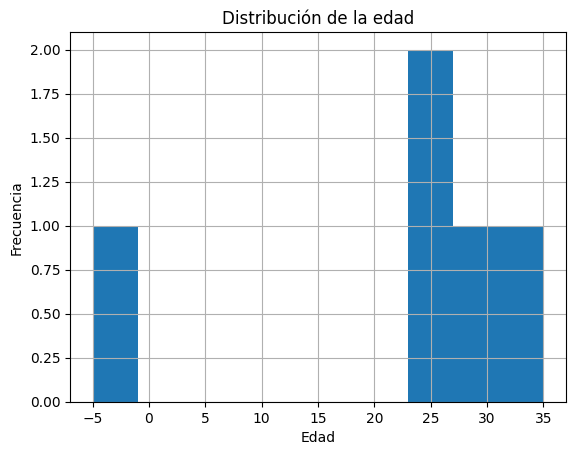

In [14]:
# Distribución de la edad
df['Edad'].hist()

# add labels and title
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la edad')

# show the plot
plt.show()

In [17]:
df['Edad'].describe()

,Edad
count,5.000000
mean,21.800000
std,15.530615
min,-5.000000
25%,25.000000
50%,25.000000
75%,29.000000
max,35.000000


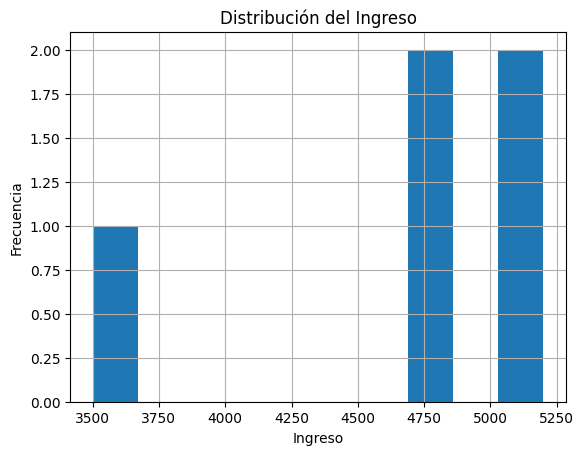

In [15]:
# Distribución de la edad
df['Ingreso'].hist()

# add labels and title
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.title('Distribución del Ingreso')

# show the plot
plt.show()

In [18]:
df['Ingreso'].describe()

,Ingreso
count,5.000000
mean,4660.000000
std,680.441033
min,3500.000000
25%,4700.000000
50%,4800.000000
75%,5100.000000
max,5200.000000


In [20]:
# Para imputar los valores nulos en la variable 'Nombre', se reemplaza por 'sin_nombre', ya que al haber pocos registros, no serìa correcto eliminar la muestra.
df['Nombre'] = df['Nombre'].fillna('sin_nombre')

# Para la variable 'Edad', se imputan los valores nulos y los valores negativos con la mediana
df['Edad'] = df['Edad'].apply(lambda x: np.nan if x < 0 else x)
df['Edad'] = df['Edad'].fillna(df['Edad'].median())

# Para la variable 'Ciudad', se imputan los valres nulos con una nueva categoría 'sin_ciudad', ya que la ciudad es un campo que no se deberìa eliminar dada su importancia
# en el análisis

df['Ciudad'] = df['Ciudad'].fillna('sin_ciudad')

# Para la variable 'Ingreso', se imputan los valores nulos con la media
df['Ingreso'] = df['Ingreso'].fillna(df['Ingreso'].mean())

# Para la variable 'FechaIngreso', se imputa con el relleno de fechas entra la anterior y la próxima
df['FechaIngreso'] = df['FechaIngreso'].fillna(method='ffill').fillna(method='bfill')

df_limpio = df


/tmp/ipython-input-1792758959.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['FechaIngreso'] = df['FechaIngreso'].fillna(method='ffill').fillna(method='bfill')


In [21]:
df_limpio.head()

,Nombre,Edad,Ciudad,Ingreso,FechaIngreso
0,Ana,25.0,Bogotá,3500.0,2023-01-01
1,Luis,27.0,Medellín,4800.0,2023-01-05
2,Pedro,35.0,sin_ciudad,4660.0,2023-01-05
3,sin_nombre,29.0,Medellín,5200.0,2023-01-10
4,Marta,27.0,Cali,5100.0,2023-01-12


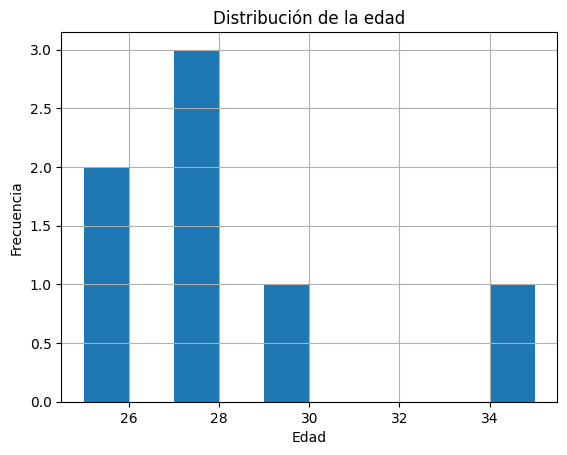

In [22]:
# Distribución de la edad
df_limpio['Edad'].hist()

# add labels and title
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la edad')

# show the plot
plt.show()

In [23]:
df_limpio['Edad'].describe()

,Edad
count,7.000000
mean,27.857143
std,3.436499
min,25.000000
25%,26.000000
50%,27.000000
75%,28.000000
max,35.000000


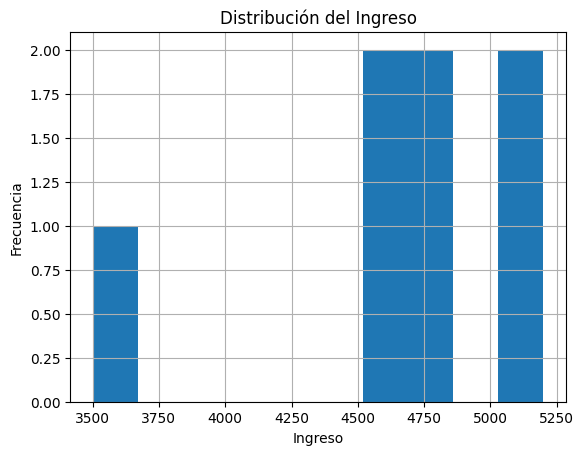

In [24]:
# Distribución de la edad
df_limpio['Ingreso'].hist()

# add labels and title
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.title('Distribución del Ingreso')

# show the plot
plt.show()

In [25]:
df_limpio['Ingreso'].describe()

,Ingreso
count,7.000000
mean,4660.000000
std,555.577777
min,3500.000000
25%,4660.000000
50%,4700.000000
75%,4950.000000
max,5200.000000


De acuerdo a los estadísticos de prueba, se puede evidenciar que la imputación no afecta la distribución de los datos y que se puede continuar con el respectivo análisis.

## <span style="color:#2F749F;"><strong>Ejercicio 2. Limpieza de duplicados</strong></span>

#### <span style="color:#2F749F;"><strong>📋 Instrucciones</strong></span>

1. Crea el DataFrame base **df** ejecutando el siguiente código:
    ```python
    df = pd.DataFrame({
        'ID': [101, 102, 102, 103, 104, 104, 104],
        'Nombre': ['Ana', 'Luis', 'Luis', 'Marta', 'Carlos', 'Carlos', 'Carlos'],
        'Edad': [25, 30, 30, 29, 40, 40, 41],
        'Ciudad': ['Bogotá', 'Cali', 'Cali', 'Medellín', 'Cali', 'Cali', 'Cali'],
        'FechaRegistro': ['2023-01-01', '2023-01-05', '2023-01-05', '2023-01-10',
                        '2023-01-15', '2023-01-15', '2023-01-16']
    })

2.  En el mismo notebook anterior, para el nuevo dataframe df, responde a las siguientes preguntas (utilizando python):
    - ¿Cuál es el total de registros originales?
    - ¿Cuáles y cuántos son los duplicados exactos?
    - ¿Cuáles y cuántos son los duplicados por varias columnas?
    - ¿Cuántos registros debes eliminar?
    - ¿Cuántos registros quedan después de la limpieza?

In [29]:
df = pd.DataFrame({
    'ID': [101, 102, 102, 103, 104, 104, 104],
    'Nombre': ['Ana', 'Luis', 'Luis', 'Marta', 'Carlos', 'Carlos', 'Carlos'],
    'Edad': [25, 30, 30, 29, 40, 40, 41],
    'Ciudad': ['Bogotá', 'Cali', 'Cali', 'Medellín', 'Cali', 'Cali', 'Cali'],
    'FechaRegistro': ['2023-01-01', '2023-01-05', '2023-01-05', '2023-01-10',
                    '2023-01-15', '2023-01-15', '2023-01-16']
})


In [32]:
df

,ID,Nombre,Edad,Ciudad,FechaRegistro
0,101,Ana,25,Bogotá,2023-01-01
1,102,Luis,30,Cali,2023-01-05
2,102,Luis,30,Cali,2023-01-05
3,103,Marta,29,Medellín,2023-01-10
4,104,Carlos,40,Cali,2023-01-15
5,104,Carlos,40,Cali,2023-01-15
6,104,Carlos,41,Cali,2023-01-16


*Total de registros originales*

In [28]:
# Calcular el total de registros originales
total_registros = df.shape[0]
print("Total de registros originales:", total_registros)

Total de registros originales: 7


*Cuáles y cuántos son duplicados exactos?*

In [27]:
#Visualizar valores duplicados
df[df.duplicated(keep=False)]

,ID,Nombre,Edad,Ciudad,FechaRegistro
1,102,Luis,30,Cali,2023-01-05
2,102,Luis,30,Cali,2023-01-05
4,104,Carlos,40,Cali,2023-01-15
5,104,Carlos,40,Cali,2023-01-15


In [34]:
#Contar los registros duplicados
df[df.duplicated(keep=False)].shape[0]

4

*Cuáles y cuántos son duplicados por varias columnas?*

In [35]:
# Registros duplicados por varias columnas
df[df.duplicated(subset=['ID', 'Nombre', 'Edad'], keep=False)]

,ID,Nombre,Edad,Ciudad,FechaRegistro
1,102,Luis,30,Cali,2023-01-05
2,102,Luis,30,Cali,2023-01-05
4,104,Carlos,40,Cali,2023-01-15
5,104,Carlos,40,Cali,2023-01-15


In [36]:
# Contar los registros duplicados por varias columnas
df[df.duplicated(subset=['ID', 'Nombre', 'Edad'], keep=False)].shape[0]

4

*Cuántos registros se deben eliminar?*

In [37]:
# Registros que se deben eliminar
df[df.duplicated(keep=False)]

,ID,Nombre,Edad,Ciudad,FechaRegistro
1,102,Luis,30,Cali,2023-01-05
2,102,Luis,30,Cali,2023-01-05
4,104,Carlos,40,Cali,2023-01-15
5,104,Carlos,40,Cali,2023-01-15


*Cuántos registros quedan después de la limpieza?*

In [38]:
# df limpio
df_limpio = df.drop_duplicates()

In [39]:
df_limpio

,ID,Nombre,Edad,Ciudad,FechaRegistro
0,101,Ana,25,Bogotá,2023-01-01
1,102,Luis,30,Cali,2023-01-05
3,103,Marta,29,Medellín,2023-01-10
4,104,Carlos,40,Cali,2023-01-15
6,104,Carlos,41,Cali,2023-01-16


## <span style="color:#2F749F;"><strong>Ejercicio 3. Corrección de errores tipográficos o de codificación</strong></span>

#### <span style="color:#2F749F;"><strong>📋 Instrucciones</strong></span>

1. Crea el DataFrame base **df** ejecutando el siguiente código:
    ```python
    df = pd.DataFrame({
        'Ciudad': ['bogota', 'Bogotá', 'BOGOTA', 'bogotá', 'bogata', 'Bógota', 'BogoTa', 'Cali', 'calí', 'medellín', 'medellin']
    })

2.  En el mismo notebook anterior, para el nuevo dataframe df, estandariza la variable ciudad utilizando python.

In [40]:
df = pd.DataFrame({
    'Ciudad': ['bogota', 'Bogotá', 'BOGOTA', 'bogotá', 'bogata', 'Bógota', 'BogoTa', 'Cali', 'calí', 'medellín', 'medellin']
})

In [41]:
df

,Ciudad
0,bogota
1,Bogotá
2,BOGOTA
3,bogotá
4,bogata
5,Bógota
6,BogoTa
7,Cali
8,calí
9,medellín


In [46]:
from difflib import get_close_matches

# Lista de ciudades válidas
ciudades_validas = ['medellin', 'bogota', 'cali']

ciudades_corregidas = []
for ciudad in df['Ciudad']:
    coincidencias = get_close_matches(ciudad, ciudades_validas, n=1, cutoff=0.6)
    if coincidencias:
        ciudades_corregidas.append(coincidencias[0])
    else:
        ciudades_corregidas.append(ciudad)

# Asignamos los valores corregidos
df['Ciudad'] = ciudades_corregidas

print(df['Ciudad'])


0       bogota
1       bogota
2       BOGOTA
3       bogota
4       bogota
5       bogota
6       bogota
7         cali
8         cali
9     medellin
10    medellin
Name: Ciudad, dtype: object


In [49]:
# Normalizamos a minúsculas
df['Ciudad'] = df['Ciudad'].str.lower()

In [48]:
df

,Ciudad
0,bogota
1,bogota
2,bogota
3,bogota
4,bogota
5,bogota
6,bogota
7,cali
8,cali
9,medellin


**Realice commit de su notebook, en la carpeta sesiones prácticas**

# <span style="color:#2F749F;"><strong>Referencias</strong></span>

Little, R. J. A., & Rubin, D. B. (2019). [*Statistical analysis with missing data*](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119482260). John Wiley & Sons.  

Van Buuren, S. (2018). [*Flexible imputation of missing data*](https://stefvanbuuren.name/fimd/). CRC Press.  

Zhang, S. (2011). [*Shell-neighbor method and its application in missing data imputation*](https://link.springer.com/article/10.1007/s10489-009-0207-6#:~:text=The%20SNI%20fills%20in%20an,neighbors%20of%20the%20incomplete%20instance.). *Knowledge-Based Systems, 24*(5), 709–715.  
